This notebook will sift through arrest data on the Pittsburgh police in order to find which neighborhoods had the least arrests.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

arrest_data = pd.read_csv("arrest-data.csv")


I cleaned the dataframe, removing a bunch of extraneous columns

In [2]:
arrest_data = arrest_data.drop(columns=["PK", "CCR", "AGE", "GENDER", "RACE", "ARRESTTIME", "ARRESTLOCATION", "OFFENSES", "INCIDENTLOCATION", "INCIDENTZONE", "INCIDENTTRACT", "COUNCIL_DISTRICT", "PUBLIC_WORKS_DIVISION", "X", "Y"])
print(arrest_data)

         _id       INCIDENTNEIGHBORHOOD
0          1                 Bloomfield
1          2               Outside City
2          3                   Westwood
3          4             East Allegheny
4          5            Crafton Heights
...      ...                        ...
66466  88204  Central Business District
66467  88205                  Shadyside
66468  88206                  Knoxville
66469  88207                 Manchester
66470  88234                        NaN

[66471 rows x 2 columns]


After getting the only important column I need, I must drop the None-value columns and sort all Neighborhoods into a dictionary to find their frequencies

In [3]:
arrest_data = arrest_data.dropna()
frequencies = dict()
for index, row in arrest_data.iterrows():
  if row['INCIDENTNEIGHBORHOOD'] in frequencies:
    frequencies[row['INCIDENTNEIGHBORHOOD']] += 1
  else:
    frequencies[row['INCIDENTNEIGHBORHOOD']] = 0
frequencies['Mount Oliver Borough'] = frequencies.pop('Mt. Oliver Boro')
frequencies['Mt. Oliver'] = frequencies.pop('Mount Oliver')
%store frequencies

Stored 'frequencies' (dict)


After sorting it into a dictionary and getting rid of many of the most crime-ridden neighborhoods, I then used matplotlib to visualize the frequencies

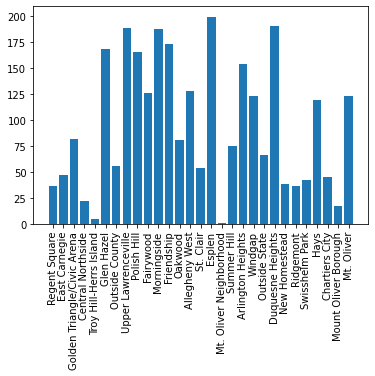

In [4]:
new_frequencies = copy.deepcopy(frequencies)
for key, val in frequencies.items():
  if val > 200:
    new_frequencies.pop(key)
#print(new_frequencies)
names = list(new_frequencies.keys())
values = list(new_frequencies.values())

plt.bar(range(len(new_frequencies)), values, tick_label=names)
plt.xticks(rotation='vertical')
plt.show()

While this graph is helpful showing many neighborhoods, we can also rank the neighborhoods with under 200 crimes in order.

In [5]:
#sort the dictionary
sorted_frequencies = dict(sorted(new_frequencies.items(), key=lambda item : item[1]))

num = 1

for key, val in sorted_frequencies.items():
    print(f"{num}. {key}, {val} crimes")
    num += 1

1. Mt. Oliver Neighborhood, 1 crimes
2. Troy Hill-Herrs Island, 5 crimes
3. Mount Oliver Borough, 17 crimes
4. Central Northside, 22 crimes
5. Regent Square, 36 crimes
6. Ridgemont, 36 crimes
7. New Homestead, 38 crimes
8. Swisshelm Park, 42 crimes
9. Chartiers City, 45 crimes
10. East Carnegie, 47 crimes
11. St. Clair, 54 crimes
12. Outside County, 56 crimes
13. Outside State, 66 crimes
14. Summer Hill, 75 crimes
15. Oakwood, 81 crimes
16. Golden Triangle/Civic Arena, 82 crimes
17. Hays, 119 crimes
18. Windgap, 123 crimes
19. Mt. Oliver, 123 crimes
20. Fairywood, 126 crimes
21. Allegheny West, 128 crimes
22. Arlington Heights, 154 crimes
23. Polish Hill, 165 crimes
24. Glen Hazel, 168 crimes
25. Friendship, 173 crimes
26. Morningside, 187 crimes
27. Upper Lawrenceville, 188 crimes
28. Duquesne Heights, 190 crimes
29. Esplen, 199 crimes


This also gives us a prettier graph!

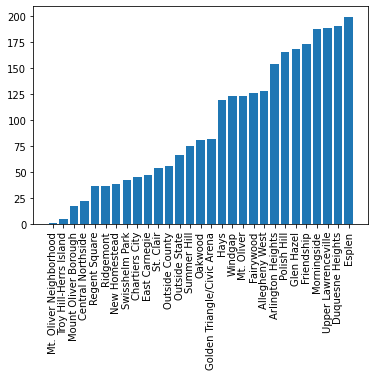

In [6]:
new_names = list(sorted_frequencies.keys())
new_values = list(sorted_frequencies.values())

plt.bar(range(len(sorted_frequencies)), new_values, tick_label=new_names)
plt.xticks(rotation='vertical')
plt.show()